In [ ]:
import time
from sklearn.linear_model import LogisticRegression
from PIL import Image
import numpy as np
import os
from sklearn.metrics import accuracy_score

def initModel(regularisation_strength):

    return LogisticRegression(
        penalty='l2',                # Régularisation L2 : bonne pour éviter le surapprentissage
        C=0.1,   # Force de régularisation plus forte (plus petit = plus régularisé)
        solver='saga',              # Compatible avec les gros datasets, performant avec L2 et L1
        max_iter=1,                # Suffisant pour convergence sur des données d’images
        class_weight='balanced',    # Gère automatiquement le déséquilibre sain / non sain
        tol=1e-4,                   # Tolérance plus stricte pour meilleure convergence
        warm_start=True,            # Permet les réentraînements progressifs (utile pour ton while)
        fit_intercept=False,         # Ajoute un biais : important si les données ne sont pas centrées
        random_state=22,            # Pour la reproductibilité
        n_jobs=-1                   # Utilise tous les cœurs CPU dispo
    )

##### MAIN #####

if __name__ == "__main__":

    #### Data initialization ####

    folder_name = "Array22"

    x_train = np.load(f'{folder_name}/x_train.npy')
    y_train = np.load(f'{folder_name}/y_train.npy')
    x_test = np.load(f'{folder_name}/x_test.npy')
    y_test = np.load(f'{folder_name}/y_test.npy')
    x_val = np.load(f'{folder_name}/x_val.npy')
    y_val = np.load(f'{folder_name}/y_val.npy')


    test_accuracy = 0
    previous_test_accuracy = 0

    regularisation_value = 0.1
    regularisation_strength = 0.1

    while test_accuracy >= previous_test_accuracy:

        #### Model initialization ####

        model = initModel(regularisation_strength)


        #### Model training ####

        start_trainingTime = time.time()
        model.fit(x_train, y_train)
        end_trainingTime = time.time()


        #### Prediction ####

        print("Valeur de la régulisation", regularisation_strength)

        previous_test_accuracy = test_accuracy

        y_pred = model.predict(x_test)
        test_accuracy = accuracy_score(y_test, y_pred)
        print("Précision sur le set de test :", test_accuracy)

        y_eval_pred = model.predict(x_val)
        evaluation_accuracy = accuracy_score(y_val, y_eval_pred)
        print("Précision sur le set d'évaluation :", evaluation_accuracy)

        #print("Arret de l'entrainement à l'itération :", model.n_iter_)

        regularisation_strength += 0.1

    print("La précision n'a pas augmenté, arrêt de l'entraînement.")
    print("Valeur de régularisation finale :", regularisation_strength - regularisation_value)
    print("Précision sur le set de test :", accuracy_score(y_test, y_pred))
    print("Précision sur le set d'évaluation :", accuracy_score(y_val, y_eval_pred))



In [ ]:
import time
from sklearn.linear_model import LogisticRegression
from PIL import Image
import numpy as np
import os
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


def initModel(random_state):

    return LogisticRegression(
        penalty='l2',
        C=0.1,
        solver='saga',
        max_iter=50,
        class_weight='balanced',
        tol=1e-4,
        warm_start=True,
        verbose=1,
        fit_intercept=True,
        random_state=random_state,
        n_jobs=-1
    )

##### MAIN #####

if __name__ == "__main__":

    #### Data initialization ####

    folder_name = "Array22"

    x_train = np.load(f'{folder_name}/x_train.npy')
    y_train = np.load(f'{folder_name}/y_train.npy')
    x_test = np.load(f'{folder_name}/x_test.npy')
    y_test = np.load(f'{folder_name}/y_test.npy')
    x_val = np.load(f'{folder_name}/x_val.npy')
    y_val = np.load(f'{folder_name}/y_val.npy')

    random_states_list = []
    test_accuracies_list = []

    test_accuracy = 0
    previous_test_accuracy = 0

    random_state_value = 1
    random_state_strength = 1

    no_improvement_count = 0  # Compteur pour suivre les itérations sans amélioration

    while test_accuracy >= previous_test_accuracy:

        #### Model initialization ####

        model = initModel(random_state_strength)


        #### Model training ####

        start_trainingTime = time.time()
        model.fit(x_train, y_train)
        end_trainingTime = time.time()


        #### Prediction ####

        print("Valeur de random state", random_state_strength)

        previous_test_accuracy = test_accuracy

        y_pred = model.predict(x_test)
        test_accuracy = accuracy_score(y_test, y_pred)
        print("Précision sur le set de test :", test_accuracy)

        y_eval_pred = model.predict(x_val)
        evaluation_accuracy = accuracy_score(y_val, y_eval_pred)
        print("Précision sur le set d'évaluation :", evaluation_accuracy)

        random_states_list.append(random_state_strength)
        test_accuracies_list.append(test_accuracy)

        #print("Arret de l'entrainement à l'itération :", model.n_iter_)

        if test_accuracy == previous_test_accuracy:
            no_improvement_count += 1
        else:
            no_improvement_count = 0

        if no_improvement_count >= 5:
            print("La précision n'évolue plus depuis 5 itérations, arrêt de l'entraînement.")
            break

        random_state_strength += 1

    print("La précision n'a pas augmenté, arrêt de l'entraînement.")
    print("Valeur de régularisation finale :", random_state_strength - random_state_value)
    print("Précision sur le set de test :", accuracy_score(y_test, y_pred))
    print("Précision sur le set d'évaluation :", accuracy_score(y_val, y_eval_pred))

    print("Random states tested:", random_states_list)
    print("Test accuracies:", test_accuracies_list)

    # Tracé du graphique
    plt.figure(figsize=(10, 6))
    plt.plot(random_states_list, test_accuracies_list, marker='o', linestyle='-', color='b', label='Précision')
    plt.title("Précision en fonction de la valeur de random_state")
    plt.xlabel("Valeur de random_state")
    plt.ylabel("Précision")
    plt.grid(True)
    plt.legend()
    plt.show()

/Users/lucas/Documents/T-DEV-810-STG_7/LogisticRegression/.venv/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/lucas/Documents/T-DEV-810-STG_7/LogisticRegression/.venv/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/lucas/Documents/T-DEV-810-STG_7/LogisticRegression/.venv/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/lucas/Documents/T-DEV-810-STG_7/LogisticRegression/.venv/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/lucas/Documents/T-DEV-810-STG_7/LogisticRegression/.venv/lib/python3.13/site-pack

Valeur de random state : 1
Précision sur le set de test : 0.8253205128205128
Précision sur le set d'évaluation : 0.875
Valeur de random state : 2
Précision sur le set de test : 0.7788461538461539
Précision sur le set d'évaluation : 0.875
Valeur de random state : 3
Précision sur le set de test : 0.8076923076923077
Précision sur le set d'évaluation : 0.875
Valeur de random state : 4
Précision sur le set de test : 0.7580128205128205
Précision sur le set d'évaluation : 0.8125
Valeur de random state : 5
Précision sur le set de test : 0.8125
Précision sur le set d'évaluation : 0.875
Valeur de random state : 6
Précision sur le set de test : 0.8173076923076923
Précision sur le set d'évaluation : 0.75
Valeur de random state : 7
Précision sur le set de test : 0.7964743589743589
Précision sur le set d'évaluation : 0.875


/Users/lucas/Documents/T-DEV-810-STG_7/LogisticRegression/.venv/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/lucas/Documents/T-DEV-810-STG_7/LogisticRegression/.venv/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/lucas/Documents/T-DEV-810-STG_7/LogisticRegression/.venv/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/lucas/Documents/T-DEV-810-STG_7/LogisticRegression/.venv/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/lucas/Documents/T-DEV-810-STG_7/LogisticRegression/.venv/lib/python3.13/site-pack

Valeur de random state : 8
Précision sur le set de test : 0.8285256410256411
Précision sur le set d'évaluation : 0.875
Valeur de random state : 9
Précision sur le set de test : 0.8301282051282052
Précision sur le set d'évaluation : 0.9375
Valeur de random state : 10
Précision sur le set de test : 0.8189102564102564
Précision sur le set d'évaluation : 0.875
Valeur de random state : 11
Précision sur le set de test : 0.8397435897435898
Précision sur le set d'évaluation : 0.875
Valeur de random state : 12
Précision sur le set de test : 0.8141025641025641
Précision sur le set d'évaluation : 0.875
Valeur de random state : 13
Précision sur le set de test : 0.7403846153846154
Précision sur le set d'évaluation : 0.75
Valeur de random state : 14
Précision sur le set de test : 0.7900641025641025
Précision sur le set d'évaluation : 0.875
Valeur de random state : 15
Précision sur le set de test : 0.8157051282051282
Précision sur le set d'évaluation : 0.875


/Users/lucas/Documents/T-DEV-810-STG_7/LogisticRegression/.venv/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/lucas/Documents/T-DEV-810-STG_7/LogisticRegression/.venv/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/lucas/Documents/T-DEV-810-STG_7/LogisticRegression/.venv/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/lucas/Documents/T-DEV-810-STG_7/LogisticRegression/.venv/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/lucas/Documents/T-DEV-810-STG_7/LogisticRegression/.venv/lib/python3.13/site-pack

Valeur de random state : 16
Précision sur le set de test : 0.8189102564102564
Précision sur le set d'évaluation : 0.875
Valeur de random state : 17
Précision sur le set de test : 0.8301282051282052
Précision sur le set d'évaluation : 0.875
Valeur de random state : 18
Précision sur le set de test : 0.8205128205128205
Précision sur le set d'évaluation : 0.875
Valeur de random state : 19
Précision sur le set de test : 0.7916666666666666
Précision sur le set d'évaluation : 0.875
Valeur de random state : 20
Précision sur le set de test : 0.8205128205128205
Précision sur le set d'évaluation : 0.875
Valeur de random state : 21
Précision sur le set de test : 0.8237179487179487
Précision sur le set d'évaluation : 0.9375
Valeur de random state : 22
Précision sur le set de test : 0.842948717948718
Précision sur le set d'évaluation : 0.875
Valeur de random state : 23
Précision sur le set de test : 0.8044871794871795
Précision sur le set d'évaluation : 0.875


/Users/lucas/Documents/T-DEV-810-STG_7/LogisticRegression/.venv/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/lucas/Documents/T-DEV-810-STG_7/LogisticRegression/.venv/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/lucas/Documents/T-DEV-810-STG_7/LogisticRegression/.venv/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/lucas/Documents/T-DEV-810-STG_7/LogisticRegression/.venv/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/lucas/Documents/T-DEV-810-STG_7/LogisticRegression/.venv/lib/python3.13/site-pack

Valeur de random state : 24
Précision sur le set de test : 0.8349358974358975
Précision sur le set d'évaluation : 0.875
Valeur de random state : 25
Précision sur le set de test : 0.8253205128205128
Précision sur le set d'évaluation : 0.875
Valeur de random state : 26
Précision sur le set de test : 0.8125
Précision sur le set d'évaluation : 0.875
Valeur de random state : 27
Précision sur le set de test : 0.8173076923076923
Précision sur le set d'évaluation : 0.875
Valeur de random state : 28
Précision sur le set de test : 0.8189102564102564
Précision sur le set d'évaluation : 0.875
Valeur de random state : 29
Précision sur le set de test : 0.8189102564102564
Précision sur le set d'évaluation : 0.875
Valeur de random state : 30
Précision sur le set de test : 0.8157051282051282
Précision sur le set d'évaluation : 0.875
Valeur de random state : 31
Précision sur le set de test : 0.8141025641025641
Précision sur le set d'évaluation : 0.875


/Users/lucas/Documents/T-DEV-810-STG_7/LogisticRegression/.venv/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/lucas/Documents/T-DEV-810-STG_7/LogisticRegression/.venv/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/lucas/Documents/T-DEV-810-STG_7/LogisticRegression/.venv/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/lucas/Documents/T-DEV-810-STG_7/LogisticRegression/.venv/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/lucas/Documents/T-DEV-810-STG_7/LogisticRegression/.venv/lib/python3.13/site-pack

Valeur de random state : 32
Précision sur le set de test : 0.8237179487179487
Précision sur le set d'évaluation : 0.875
Valeur de random state : 33
Précision sur le set de test : 0.8141025641025641
Précision sur le set d'évaluation : 0.875
Valeur de random state : 34
Précision sur le set de test : 0.8189102564102564
Précision sur le set d'évaluation : 0.875
Valeur de random state : 35
Précision sur le set de test : 0.8092948717948718
Précision sur le set d'évaluation : 0.875
Valeur de random state : 36
Précision sur le set de test : 0.8253205128205128
Précision sur le set d'évaluation : 0.875
Valeur de random state : 37
Précision sur le set de test : 0.8333333333333334
Précision sur le set d'évaluation : 0.8125
Valeur de random state : 38
Précision sur le set de test : 0.8285256410256411
Précision sur le set d'évaluation : 0.875
Valeur de random state : 39
Précision sur le set de test : 0.8157051282051282
Précision sur le set d'évaluation : 0.875
Valeur de random state : 40
Précision s

/Users/lucas/Documents/T-DEV-810-STG_7/LogisticRegression/.venv/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/lucas/Documents/T-DEV-810-STG_7/LogisticRegression/.venv/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/lucas/Documents/T-DEV-810-STG_7/LogisticRegression/.venv/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/lucas/Documents/T-DEV-810-STG_7/LogisticRegression/.venv/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/lucas/Documents/T-DEV-810-STG_7/LogisticRegression/.venv/lib/python3.13/site-pack

Valeur de random state : 46
Précision sur le set de test : 0.8060897435897436
Précision sur le set d'évaluation : 0.875
Valeur de random state : 47
Précision sur le set de test : 0.8189102564102564
Précision sur le set d'évaluation : 0.875
Valeur de random state : 48
Précision sur le set de test : 0.8028846153846154
Précision sur le set d'évaluation : 0.875
Valeur de random state : 49
Précision sur le set de test : 0.8157051282051282
Précision sur le set d'évaluation : 0.875
Valeur de random state : 50
Précision sur le set de test : 0.8253205128205128
Précision sur le set d'évaluation : 0.875
La précision n'a pas augmenté, arrêt de l'entraînement.
Précision sur le set de test : 0.8253205128205128
Précision sur le set d'évaluation : 0.875
Random states tested: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]
Test accuracies: [0.8253205128205128, 

/Users/lucas/Documents/T-DEV-810-STG_7/LogisticRegression/.venv/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/lucas/Documents/T-DEV-810-STG_7/LogisticRegression/.venv/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/lucas/Documents/T-DEV-810-STG_7/LogisticRegression/.venv/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/lucas/Documents/T-DEV-810-STG_7/LogisticRegression/.venv/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


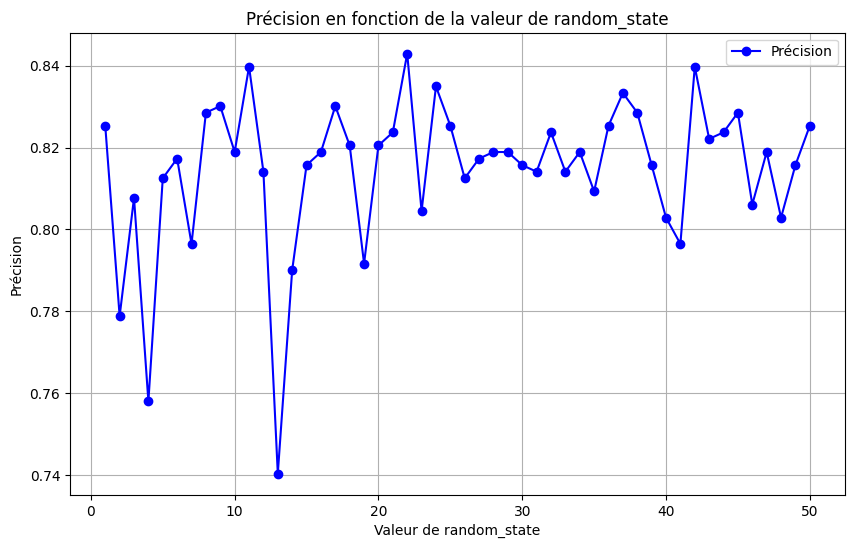

In [2]:
import time
from sklearn.linear_model import LogisticRegression
from PIL import Image
import numpy as np
import os
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


def initModel(random_state_value):

    return LogisticRegression(
        penalty='l2',
        C=0.1,
        solver='saga',
        max_iter=1,
        class_weight='balanced',
        tol=1e-4,
        fit_intercept=True,
        random_state=random_state_value,
        n_jobs=-1
    )

##### MAIN #####

if __name__ == "__main__":

    #### Initialisation des données ####
    folder_name = "Array22"
    x_train = np.load(f'{folder_name}/x_train.npy')
    y_train = np.load(f'{folder_name}/y_train.npy')
    x_test = np.load(f'{folder_name}/x_test.npy')
    y_test = np.load(f'{folder_name}/y_test.npy')
    x_val = np.load(f'{folder_name}/x_val.npy')
    y_val = np.load(f'{folder_name}/y_val.npy')

    random_states_list = []
    test_accuracies_list = []

    random_state_value = 1
    iteration_count = 0

    while iteration_count < 50:

        #### Initialisation du modèle ####
        model = initModel(random_state_value)

        #### Entraînement du modèle ####
        start_trainingTime = time.time()
        model.fit(x_train, y_train)
        end_trainingTime = time.time()

        #### Prédiction ####
        print("Valeur de random state :", random_state_value)

        y_pred = model.predict(x_test)
        test_accuracy = accuracy_score(y_test, y_pred)
        print("Précision sur le set de test :", test_accuracy)

        y_eval_pred = model.predict(x_val)
        evaluation_accuracy = accuracy_score(y_val, y_eval_pred)
        print("Précision sur le set d'évaluation :", evaluation_accuracy)

        random_states_list.append(random_state_value)
        test_accuracies_list.append(test_accuracy)

        random_state_value += 1
        iteration_count += 1

    print("La précision n'a pas augmenté, arrêt de l'entraînement.")
    print("Précision sur le set de test :", accuracy_score(y_test, y_pred))
    print("Précision sur le set d'évaluation :", accuracy_score(y_val, y_eval_pred))

    print("Random states tested:", random_states_list)
    print("Test accuracies:", test_accuracies_list)

    # Tracé du graphique
    plt.figure(figsize=(10, 6))
    plt.plot(random_states_list, test_accuracies_list, marker='o', linestyle='-', color='b', label='Précision')
    plt.title("Précision en fonction de la valeur de random_state")
    plt.xlabel("Valeur de random_state")
    plt.ylabel("Précision")
    plt.grid(True)
    plt.legend()
    plt.show()